# Correlation

Correlation is the statistical relationship between two variables: is expressed as $ cor=E \, [(x - \overline{x}) \, (y - \overline{y})] $

The following example is taken from:
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


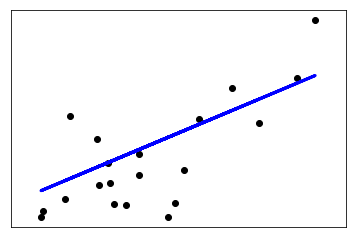

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Another linear regression source in python:
http://www.dataschool.io/linear-regression-in-python/

----
Data is diamond prices (Signapore dollars) and diamond weight in carats (standard measure of diamond mass, 0.2 g).

~~To get the data use library(UsingR); data(diamond)~~

Plotting the fitted regression line and data

In [5]:
diamond_df = pd.read_csv("https://raw.githubusercontent.com/bebosudo/UsingR_datasets/fd716971d8/datasets/diamond.csv", index_col=0)
diamond_df.head()

,carat,price
1,0.17,355
2,0.16,328
3,0.17,350
4,0.18,325
5,0.25,642


The deviance can be interpreted as "how much is a model distant from the reality".

In [6]:
lm = smf.ols(formula='price ~ carat', data=diamond_df).fit()
lm.params

Intercept    -259.625907
carat        3721.024852
dtype: float64

### Linear regression on the Nepali dataset.

https://cran.r-project.org/web/packages/faraway/faraway.pdf page 65

In [ ]:
int* nuovo_array[14];
int** elemento;

In [29]:
nepali_df = pd.read_csv("https://raw.githubusercontent.com/ferdas/faraway_csv/d2ac718a8137/datasets/nepali.csv", index_col=0)
nepali_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000.0,257998.505000,135188.465996,120011.0,120368.75,360111.5,360591.25,520091.0
sex,1000.0,1.465000,0.499023,1.0,1.00,1.0,2.00,2.0
wt,877.0,11.188483,2.942286,3.8,9.00,11.1,13.20,19.2
ht,877.0,85.170353,11.997792,52.4,76.40,84.8,94.30,110.7
mage,1000.0,28.470000,6.248051,17.0,24.00,28.0,34.00,52.0
lit,1000.0,0.045000,0.207408,0.0,0.00,0.0,0.00,1.0
died,1000.0,0.630000,0.966454,0.0,0.00,0.0,1.00,4.0
alive,1000.0,4.320000,2.502771,1.0,2.00,4.0,6.00,14.0
age,1000.0,37.662000,18.631879,0.0,22.00,37.0,53.00,76.0


In [53]:
lm = smf.ols(formula='wt ~ ht', data=nepali_df).fit()
print(lm.params)
lm.resid.head()

Intercept   -8.758147
ht           0.234197
dtype: float64


1    0.199392
2   -0.432939
3   -0.437395
4   -0.135530
6   -0.674908
dtype: float64

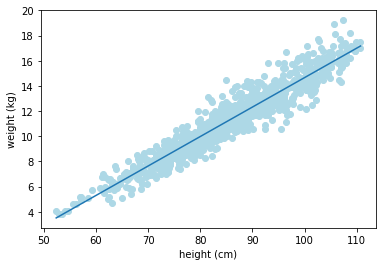

In [49]:
interc, ht_coeff = lm.params
ht_min, ht_max = min(nepali_df["ht"]), max(nepali_df["ht"])

# Plot the points 
plt.scatter(nepali_df["ht"], nepali_df["wt"], color="lightblue")

# Plot the linear regression line.
plt.plot((ht_min, ht_max), (ht_min*ht_coeff + interc, ht_max*ht_coeff + interc))

plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

plt.show()